<a href="https://colab.research.google.com/github/sejongsmarcle/2023_Spring_Kaggle_Study/blob/main/%EB%94%B0%EB%A6%89%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**목표: 각 날짜의 1시간 전의 기상상황을 가지고 1시간 후의 따릉이 대여수를 예측해보기**

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# DecisionTree가 모여서 RandomForest가 만들어짐

In [2]:
# DATA 불러오기
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/따릉이/따릉이/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/따릉이/따릉이/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/따릉이/따릉이/submission.csv')

#DATA 분석

In [3]:
# 상위 5개 행 분석
train.head()
# 모두 수치형으로 이루어져 있음

id  hour  hour_bef_temperature  hour_bef_precipitation  hour_bef_windspeed  \
0   3    20                  16.3                     1.0                 1.5   
1   6    13                  20.1                     0.0                 1.4   
2   7     6                  13.9                     0.0                 0.7   
3   8    23                   8.1                     0.0                 2.7   
4   9    18                  29.5                     0.0                 4.8   

   hour_bef_humidity  hour_bef_visibility  hour_bef_ozone  hour_bef_pm10  \
0               89.0                576.0           0.027           76.0   
1               48.0                916.0           0.042           73.0   
2               79.0               1382.0           0.033           32.0   
3               54.0                946.0           0.040           75.0   
4                7.0               2000.0           0.057           27.0   

   hour_bef_pm2.5  count  
0            33.0   49.0  
1            40.0  159.0  
2            19.0   26.0  
3            64.0   57.0  
4            11.0  431.0

id: 날짜와 시간

hour_bef_temperature: 1시간 전 기온

hour_bef_precipitation: 1시간 전 비 정보, 비가 안 왔으면 0.0, 왔으면 1.0

hour_bef_windspeed: 1시간 전 풍속

hour_bef_humidity: 1시간 전 시계

hour_bef_ozone: 1시간 전 오존

hour_bef_pm10: 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)

hour_bef_pm2.5: 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)

count: 시간에 따른 따릉이 대여 수

In [5]:
test.head()
# count가 없음 -> 예측을 해야하기 때문에 없다!!

id  hour  hour_bef_temperature  hour_bef_precipitation  hour_bef_windspeed  \
0   0     7                  20.7                     0.0                 1.3   
1   1    17                  30.0                     0.0                 5.4   
2   2    13                  19.0                     1.0                 2.1   
3   4     6                  22.5                     0.0                 2.5   
4   5    22                  14.6                     1.0                 3.4   

   hour_bef_humidity  hour_bef_visibility  hour_bef_ozone  hour_bef_pm10  \
0               62.0                954.0           0.041           44.0   
1               33.0               1590.0           0.061           49.0   
2               95.0                193.0           0.020           36.0   
3               60.0               1185.0           0.027           52.0   
4               93.0                218.0           0.041           18.0   

   hour_bef_pm2.5  
0            27.0  
1            36.0  
2            28.0  
3            38.0  
4            15.0

In [7]:
submission.head()
# 예측한 count값을 입력할 수 있게 비어있음

id  count
0   0    NaN
1   1    NaN
2   2    NaN
3   4    NaN
4   5    NaN

In [10]:
# DATA 행, 열 분석
print(train.shape)
print(test.shape)
print(submission.shape)
# test의 열이 1개가 부족함
# submission의 행은 test의 행과 똑같음

(1459, 11)
(715, 10)
(715, 2)


In [12]:
# 결측값 확인
train.info()
# id와 hour은 1459개의 값이 잘 채워져 있음
# 나머지는 조금 비어있음 -> 결측값(값이 비어있는 뜻)이 있으면 오류가 생김 -> 오류를 없애기 위해서는 결측값을 채워넣어야 함 -> 사전에 확인해야됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [14]:
test.info()
# 마찬가지로 결측값 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


In [15]:
# column 별로 기술 통계량을 보여줌
train.describe()

# 기술 통계량이란, 해당 column을 대표할 수 있는 통계값들을 의미

id         hour  hour_bef_temperature  hour_bef_precipitation  \
count  1459.000000  1459.000000           1457.000000             1457.000000   
mean   1105.914325    11.493489             16.717433                0.031572   
std     631.338681     6.922790              5.239150                0.174917   
min       3.000000     0.000000              3.100000                0.000000   
25%     555.500000     5.500000             12.800000                0.000000   
50%    1115.000000    11.000000             16.600000                0.000000   
75%    1651.000000    17.500000             20.100000                0.000000   
max    2179.000000    23.000000             30.000000                1.000000   

       hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
count         1450.000000        1457.000000          1457.000000   
mean             2.479034          52.231297          1405.216884   
std              1.378265          20.370387           583.131708   
min              0.000000           7.000000            78.000000   
25%              1.400000          36.000000           879.000000   
50%              2.300000          51.000000          1577.000000   
75%              3.400000          69.000000          1994.000000   
max              8.000000          99.000000          2000.000000   

       hour_bef_ozone  hour_bef_pm10  hour_bef_pm2.5        count  
count     1383.000000    1369.000000     1342.000000  1459.000000  
mean         0.039149      57.168736       30.327124   108.563400  
std          0.019509      31.771019       14.713252    82.631733  
min          0.003000       9.000000        8.000000     1.000000  
25%          0.025500      36.000000       20.000000    37.000000  
50%          0.039000      51.000000       26.000000    96.000000  
75%          0.052000      69.000000       37.000000   150.000000  
max          0.125000     269.000000       90.000000   431.000000

In [16]:
test.describe()

id        hour  hour_bef_temperature  hour_bef_precipitation  \
count   715.000000  715.000000            714.000000              714.000000   
mean   1056.854545   11.472727             23.263305                0.051821   
std     625.574471    6.928427              4.039645                0.221820   
min       0.000000    0.000000             14.600000                0.000000   
25%     507.000000    5.500000             20.300000                0.000000   
50%    1046.000000   11.000000             22.900000                0.000000   
75%    1616.500000   17.000000             26.375000                0.000000   
max    2177.000000   23.000000             33.800000                1.000000   

       hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
count          714.000000         714.000000           714.000000   
mean             2.388515          56.668067          1359.494398   
std              1.171270          19.661880           614.171870   
min              0.000000          16.000000           126.000000   
25%              1.500000          42.000000           807.250000   
50%              2.300000          55.000000          1489.000000   
75%              3.275000          73.750000          2000.000000   
max              5.900000         100.000000          2000.000000   

       hour_bef_ozone  hour_bef_pm10  hour_bef_pm2.5  
count      680.000000     678.000000      679.000000  
mean         0.041196      36.930678       24.939617  
std          0.020656      12.641503       10.075857  
min          0.003000       9.000000        7.000000  
25%          0.027000      28.000000       17.000000  
50%          0.039000      35.000000       24.000000  
75%          0.052250      45.000000       31.000000  
max          0.138000      94.000000       69.000000

In [19]:
# 시간별로 집단화를 시켜줌 -> groupby 함수를 사용
train.groupby('hour').mean()['count']

# 기술 통계량에서 hour의 MAX가 23어서 23까지 나와있는듯(?) 

hour
0      71.766667
1      47.606557
2      31.409836
3      21.377049
4      13.524590
5      13.114754
6      24.557377
7      62.360656
8     136.688525
9      93.540984
10     78.803279
11     88.327869
12    111.901639
13    120.050000
14    134.590164
15    152.967213
16    169.100000
17    187.133333
18    262.163934
19    201.606557
20    164.868852
21    168.816667
22    148.245902
23    103.852459
Name: count, dtype: float64

<Axes: xlabel='hour'>

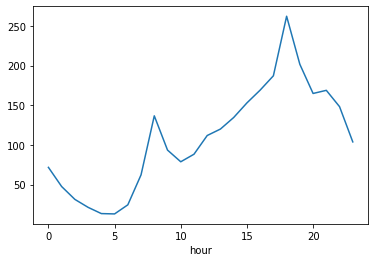

In [20]:
# 시각화(선 그래프)
train.groupby('hour').mean()['count'].plot()

# 8시쯤에 따릉이 대여 수가 증가
# 17-18시쯤에 따릉이 대여 수 증가
# 출퇴근, 등교, 하교 시간에 대여 수 증가하는 것
# 시각화해서 통념&아이디어를 확인해보는 것 중요!

In [38]:
# 다양하게 커스텀 가능
import matplotlib.pyplot as plt

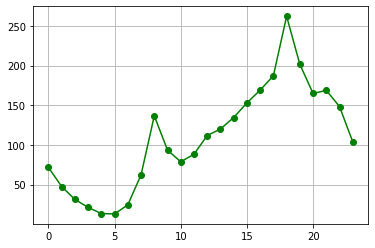

In [39]:
# 작음 따움표 앞에 .(점)아니고 ,(콤마)임
plt.plot(train.groupby('hour').mean()['count'], 'go-')
plt.grid() # 보조선 추가

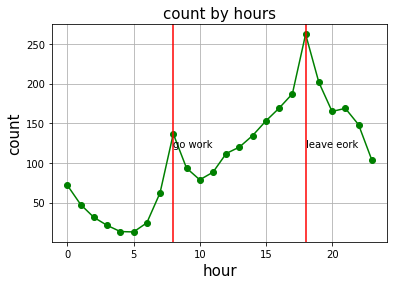

In [50]:
plt.plot(train.groupby('hour').mean()['count'], 'go-')
plt.grid()

plt.title('count by hours', fontsize = 15) # 그래프 이름
plt.xlabel('hour', fontsize = 15) # x축 이름
plt.ylabel('count', fontsize = 15) # y축 이름

plt.axvline(8, color = 'r')
plt.axvline(18, color = 'r') # 빨간선(보조선)을 추가해서 강조할 수 있음

plt.text(8, 120, 'go work', fontsize = 10)
plt.text(18, 120, 'leave work', fontsize = 10) # 증가 지점에 텍스트를 표시할 수 있음

plt.savefig('picture,png') # 그래프를 파일로 저장하는 방법

그래프가 많으면 하나하나 그려보는 것은 비효율적임

상관계수를 통해 나타내면 됨

상관계수는 -1에서 1사이의 값을 지님

1: x축이 증가할 때마다 y축도 덩달아서 증가하는 현상

0에 가까워질수록: x축이 증가할 때마다 y축이 증가하는 정도가 좀 더 완만해지는 현상

-1에 가까워질수록: x변수가 증가할수록 y변수가 감소하는 방향이 강해짐

**상관계수 != 기울기**

**상관계수 != 인과관계**

**상관계수를 보는 이유**

정보 중에서 모델 학습의 정확도를 떨어뜨리는 정보가 있음

상관계수가 높은 변수를 선택

In [51]:
train.corr() # corr: 상관계수를 보는 함수

id      hour  hour_bef_temperature  \
id                      1.000000 -0.010901             -0.000029   
hour                   -0.010901  1.000000              0.407306   
hour_bef_temperature   -0.000029  0.407306              1.000000   
hour_bef_precipitation -0.056267  0.021646             -0.097056   
hour_bef_windspeed     -0.003353  0.462797              0.375618   
hour_bef_humidity      -0.017948 -0.329612             -0.496088   
hour_bef_visibility     0.008950  0.176491              0.197417   
hour_bef_ozone          0.055234  0.390188              0.541228   
hour_bef_pm10          -0.025510 -0.035907             -0.003830   
hour_bef_pm2.5          0.003545 -0.061229             -0.078665   
count                  -0.002131  0.626047              0.619404   

                        hour_bef_precipitation  hour_bef_windspeed  \
id                                   -0.056267           -0.003353   
hour                                  0.021646            0.462797   
hour_bef_temperature                 -0.097056            0.375618   
hour_bef_precipitation                1.000000            0.022746   
hour_bef_windspeed                    0.022746            1.000000   
hour_bef_humidity                     0.276481           -0.433012   
hour_bef_visibility                  -0.217155            0.252092   
hour_bef_ozone                       -0.062461            0.520526   
hour_bef_pm10                        -0.051266            0.010176   
hour_bef_pm2.5                        0.004742           -0.199113   
count                                -0.163985            0.459906   

                        hour_bef_humidity  hour_bef_visibility  \
id                              -0.017948             0.008950   
hour                            -0.329612             0.176491   
hour_bef_temperature            -0.496088             0.197417   
hour_bef_precipitation           0.276481            -0.217155   
hour_bef_windspeed              -0.433012             0.252092   
hour_bef_humidity                1.000000            -0.592244   
hour_bef_visibility             -0.592244             1.000000   
hour_bef_ozone                  -0.421047             0.101899   
hour_bef_pm10                   -0.108106            -0.403277   
hour_bef_pm2.5                   0.167736            -0.644989   
count                           -0.471142             0.299094   

                        hour_bef_ozone  hour_bef_pm10  hour_bef_pm2.5  \
id                            0.055234      -0.025510        0.003545   
hour                          0.390188      -0.035907       -0.061229   
hour_bef_temperature          0.541228      -0.003830       -0.078665   
hour_bef_precipitation       -0.062461      -0.051266        0.004742   
hour_bef_windspeed            0.520526       0.010176       -0.199113   
hour_bef_humidity            -0.421047      -0.108106        0.167736   
hour_bef_visibility           0.101899      -0.403277       -0.644989   
hour_bef_ozone                1.000000       0.113015        0.017313   
hour_bef_pm10                 0.113015       1.000000        0.489558   
hour_bef_pm2.5                0.017313       0.489558        1.000000   
count                         0.477614      -0.114288       -0.134293   

                           count  
id                     -0.002131  
hour                    0.626047  
hour_bef_temperature    0.619404  
hour_bef_precipitation -0.163985  
hour_bef_windspeed      0.459906  
hour_bef_humidity      -0.471142  
hour_bef_visibility     0.299094  
hour_bef_ozone          0.477614  
hour_bef_pm10          -0.114288  
hour_bef_pm2.5         -0.134293  
count                   1.000000

In [52]:
import seaborn as sns

<Axes: >

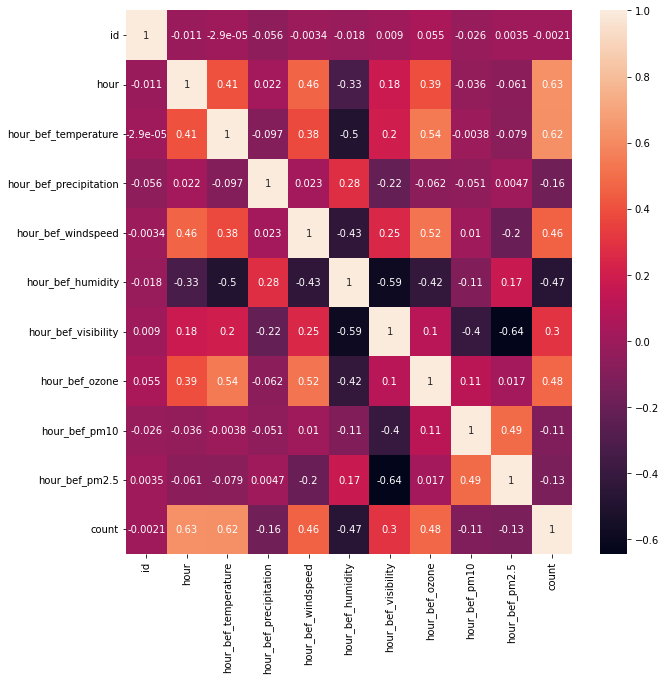

In [57]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True)

# hour, 한시간 전 온도, 한시간 전 풍속을 사용할 예정 

# 전처리

In [58]:
# 결측치를 확인하는 함수
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [61]:
train[train['hour_bef_temperature'].isna()]

# 전체 평균으로 결측치를 대체하는 것이 아니라, 각 시간별 평균으로 결측치를 대체

id  hour  hour_bef_temperature  hour_bef_precipitation  \
934   1420     0                   NaN                     NaN   
1035  1553    18                   NaN                     NaN   

      hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
934                  NaN                NaN                  NaN   
1035                 NaN                NaN                  NaN   

      hour_bef_ozone  hour_bef_pm10  hour_bef_pm2.5  count  
934              NaN            NaN             NaN   39.0  
1035             NaN            NaN             NaN    1.0

In [63]:
train.groupby('hour').mean()['hour_bef_temperature']

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

In [66]:
train['hour_bef_temperature'].fillna({934:14.788136, 1035:20.926667}, inplace = True)
# 결측값이 있는 934번은 hour가 0이기 때문에, hour가 0인 평균 14.x을 넣음
# 결측값이 있는 1035번은 hour가 18이기 때문에, hour가 18인 평균 20.x을 넣음

# inplace = True를 통해 값을 저장

In [75]:
train[train['hour_bef_windspeed'].isna()]

id  hour  hour_bef_temperature  hour_bef_precipitation  \
18      33    13             22.600000                     0.0   
244    381     1             14.100000                     0.0   
260    404     3             14.000000                     0.0   
376    570     0             14.300000                     0.0   
780   1196    20             16.500000                     0.0   
934   1420     0             14.788136                     NaN   
1035  1553    18             20.926667                     NaN   
1138  1717    12             21.400000                     0.0   
1229  1855     2             14.000000                     0.0   

      hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
18                   NaN               41.0                987.0   
244                  NaN               55.0               1992.0   
260                  NaN               50.0               2000.0   
376                  NaN               49.0               2000.0   
780                  NaN               31.0               2000.0   
934                  NaN                NaN                  NaN   
1035                 NaN                NaN                  NaN   
1138                 NaN               44.0               1375.0   
1229                 NaN               52.0               2000.0   

      hour_bef_ozone  hour_bef_pm10  hour_bef_pm2.5  count  
18             0.046           64.0            39.0  208.0  
244              NaN            NaN             NaN   38.0  
260            0.049           35.0            22.0   17.0  
376            0.044           37.0            20.0   58.0  
780            0.058           39.0            18.0  181.0  
934              NaN            NaN             NaN   39.0  
1035             NaN            NaN             NaN    1.0  
1138           0.044           61.0            37.0  116.0  
1229           0.044           37.0            20.0   20.0

In [78]:
train.groupby('hour').mean()['hour_bef_windspeed']

hour
0     1.965517
1     1.836667
2     1.633333
3     1.620000
4     1.409836
5     1.296721
6     1.331148
7     1.262295
8     1.632787
9     1.829508
10    2.122951
11    2.485246
12    2.766667
13    3.281356
14    3.522951
15    3.768852
16    3.820000
17    3.801667
18    3.838333
19    3.595082
20    3.278333
21    2.755000
22    2.498361
23    2.195082
Name: hour_bef_windspeed, dtype: float64

In [79]:
train['hour_bef_windspeed'].fillna({18:3.281356, 244:1.836667, 260:1.620000, 376:1.965517, 780:3.278333, 934:1.965517, 1035:3.838333, 1138:2.766667, 1229:1.633333}, inplace = True)

In [85]:
train.isna().sum()

# 대체했기 때문에, 0으로 뜸

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      2
hour_bef_windspeed          0
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [89]:
# test 결측값도 대체
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [91]:
test[test['hour_bef_temperature'].isna()]

id  hour  hour_bef_temperature  hour_bef_precipitation  \
653  1943    19                   NaN                     NaN   

     hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
653                 NaN                NaN                  NaN   

     hour_bef_ozone  hour_bef_pm10  hour_bef_pm2.5  
653             NaN            NaN             NaN

In [103]:
train.groupby('hour').mean()['hour_bef_temperature']

# test가 아니라, train의 평균으로 대체

hour
0     14.788136
1     14.155738
2     13.747541
3     13.357377
4     13.001639
5     12.673770
6     12.377049
7     12.191803
8     12.600000
9     14.318033
10    16.242623
11    18.019672
12    19.457377
13    20.648333
14    21.234426
15    21.744262
16    22.015000
17    21.603333
18    20.926667
19    19.704918
20    18.191803
21    16.978333
22    16.063934
23    15.418033
Name: hour_bef_temperature, dtype: float64

In [102]:
test['hour_bef_temperature'].fillna({653:19.704918}, inplace = True)

In [95]:
test[test['hour_bef_windspeed'].isna()]

id  hour  hour_bef_temperature  hour_bef_precipitation  \
653  1943    19                   NaN                     NaN   

     hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
653                 NaN                NaN                  NaN   

     hour_bef_ozone  hour_bef_pm10  hour_bef_pm2.5  
653             NaN            NaN             NaN

In [96]:
train.groupby('hour').mean()['hour_bef_windspeed']

hour
0     1.965517
1     1.836667
2     1.633333
3     1.620000
4     1.409836
5     1.296721
6     1.331148
7     1.262295
8     1.632787
9     1.829508
10    2.122951
11    2.485246
12    2.766667
13    3.281356
14    3.522951
15    3.768852
16    3.820000
17    3.801667
18    3.838333
19    3.595082
20    3.278333
21    2.755000
22    2.498361
23    2.195082
Name: hour_bef_windspeed, dtype: float64

In [100]:
test['hour_bef_windspeed'].fillna({653:3.595082}, inplace = True)

In [104]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     1
hour_bef_windspeed         0
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

# 모델 구축

다양한 정보를 볼 수 있는 단축키: ctrl + shift

In [107]:
# 사용할 변수: 시간, 한시간 전 기온, 한 시간전 풍속

features = ['hour', 'hour_bef_temperature', 'hour_bef_windspeed']
X_train = train[features]
Y_train = train['count']
X_test = test[features]

# 사용할 변수를 분리시킴

In [108]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(1459, 3)
(1459,)
(715, 3)


In [113]:
# 모델 생성
# Random forest란: 의사결정 트리를 랜덤하게 나온 것을 투표하여 결정하는 것(분류, 회귀에 사용됨)

model100 = RandomForestRegressor(n_estimators=100, random_state=0)
model100_5 = RandomForestRegressor(n_estimators=100, max_depth=5,random_state=0)
model200 = RandomForestRegressor(n_estimators=200, random_state=0)

# 모델을 튜닝하는 과정(옵션을 주어서 가장 적합한 모델을 찾는다)

# 다양한 나무들이 예측을 하고, 예측된 다양한 값을 최종적으로 채택을 하는 것
# n_estimators: 나무의 수
# max_depth: 트리의 깊이
# max_features: 나누는 수

# n_estimator는 클 수록 좋다. 트리를 많이 만들어 볼수록 좋음(경우의 수가 많아짐)
# max_features는 각 트리의 무작위를 얼마나 할 것인지 결정함
# 작은 max_features와 큰 n_estimator는 과대 적합을 줄이는 장점이 있음
# n_estimator와 max_features를 조절하여 사용하는 것이 좋음

In [115]:
# 모델을 학습하는 과정
model100.fit(X_train, Y_train)
model100_5.fit(X_train, Y_train)
model200.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=200, random_state=0)

In [117]:
# 입력 데이터의 응답 변수를 예측함
ypred1 = model100.predict(X_test)
ypred2 = model100_5.predict(X_test)
ypred3 = model200.predict(X_test)

In [120]:
submission['count'] = ypred1
submission.to_csv('model100.csv', index = False)

In [121]:
submission['count'] = ypred2
submission.to_csv('model100_5.csv', index = False)

In [122]:
submission['count'] = ypred3
submission.to_csv('model200.csv', index = False)